In [1]:
import geopandas as gpd
import cobra.postgres.interface as pgi
import cobra.utils.filehandling as fh
import cobra.utils.jobhandling as jh
import geopandas as gpd
import cobra.utils.geodatahandling as gdh

In [2]:
fileman = fh.Filemanager()
jobman = jh.Jobmanager()

In [3]:
#jobman.delete_jobs()

In [ ]:
#fileman.download_plain_file('https://download.geofabrik.de/europe/norway-latest.osm.pbf','Norway')

In [ ]:
! ls /download/Norway

In [4]:
datasets = fileman.get_data(datatype='OSM PBF')
datasets.head()

,Type,Dataset,File,Path,Size (MB)
41,OSM PBF,Norway,norway-latest.osm.pbf,/download/Norway,1032.52
42,OSM PBF,rbzddorf,duesseldorf-regbez-latest.osm.pbf,/download/rbzddorf,171.87
43,OSM PBF,Faroe,faroe-islands-latest.osm.pbf,/download/Faroe,4.59


In [5]:
norway = datasets.iloc[0]

In [6]:
norway

Type                       OSM PBF
Dataset                     Norway
File         norway-latest.osm.pbf
Path              /download/Norway
Size (MB)                  1032.52
Name: 41, dtype: object

In [7]:
jobman.create_import_job_from_dataset(norway, 'norwaypower', style='/styles/power.style')

In [ ]:
! ls /styles

In [12]:
jobman.get_jobs(df=True)

,UUID,Name,Job Type,Date created,Date started,Date finished,Priority,Status
0,185f0d0f-ba2a-48b2-ae10-50aaaa755670,Load OSM from Norway,osm2pg,"Tue, 18 Jan 2022 21:43:55 GMT",None,None,42,Failed


In [21]:
#sql = 'SELECT osm.way AS geom, osm.* FROM man2.planet_osm_line osm WHERE power IS NOT NULL'
sql = "SELECT osm.way AS geom, osm.* FROM man2.planet_osm_line osm WHERE power IS NOT NULL AND operator like 'Lede'"
pg_interface = pgi.PgInterface()
conn = pg_interface.get_connection()
powerlines = gpd.GeoDataFrame.from_postgis(sql, conn)

In [14]:
powerlines.head()

,geom,osm_id,power,voltage,cables,circuits,operator,wires,frequency,name,ref,line,way
0,"LINESTRING (703979.896 7230046.556, 703067.766...",161363331,cable,450000,2,1,Statnett;TenneT,None,0,NorNed,None,None,0102000020110F0000060000007148F5CAD77B25410615...
1,"LINESTRING (710124.974 7130253.900, 708762.303...",161363331,cable,450000,2,1,Statnett;TenneT,None,0,NorNed,None,None,0102000020110F000006000000073AE3F2D9AB2541E490...
2,"LINESTRING (764868.874 7066022.812, 764889.813...",161363331,cable,450000,2,1,Statnett;TenneT,None,0,NorNed,None,None,0102000020110F00004A000000562391BF89572741542A...
3,"LINESTRING (878881.965 7359727.949, 893625.216...",370147304,cable,525000,2,None,Statnett; TenneT,None,0,NordLink,None,None,0102000020110F000003000000F1A4FFED43D22A411437...
4,"LINESTRING (908325.294 7264162.768, 912963.716...",370147304,cable,525000,2,None,Statnett; TenneT,None,0,NordLink,None,None,0102000020110F00000800000031464C964AB82B41EB00...


<AxesSubplot:>

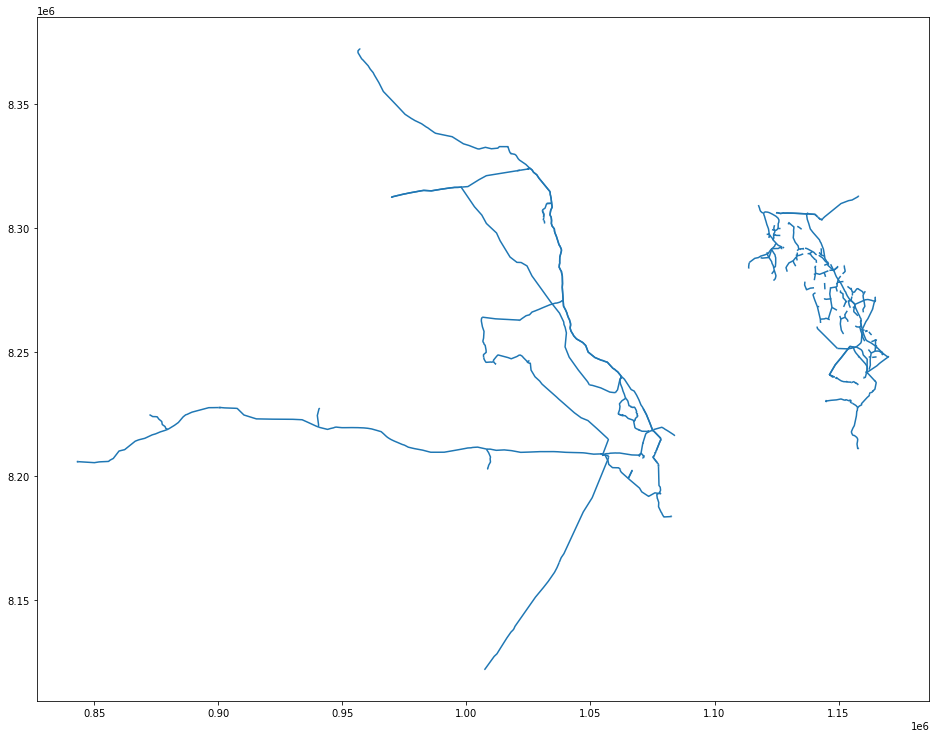

In [22]:
powerlines.plot(figsize=(16, 16))